### **Loan Default Prediction Project Report**

**KAJAL KALRA - 055019**

**KARTIK TALWAR - 055020**


**Submitted By: Group no- 5**


1. **Project Overview**

This project aims to predict loan default using machine learning techniques, particularly deep learning models built with TensorFlow/Keras. The dataset consists of financial records of loan applicants, and the goal is to classify whether a borrower is likely to default. The model can help financial institutions assess risk and make informed lending decisions.

2. **Dataset Overview**

2.1 *Dataset Name*

Loan_default.csv

2.2 *Data Loading and Initial Inspection*

The dataset is uploaded manually using Google Colab's file upload feature.

Pandas is used to read the dataset into a DataFrame.

Initial exploration involves checking the first few rows, data types, summary statistics, and missing values.

The dataset contains both numerical and categorical features, requiring appropriate preprocessing.

2.3 *Data Exploration*

df.info() provides details about column data types and non-null counts.

df.describe() offers statistical summaries such as mean, standard deviation, and quartiles.

Missing values are identified using df.isnull().sum().

Distribution of key numerical variables is visualized using histograms and box plots.

Correlation analysis is conducted to identify relationships between features.

3. **Data Preprocessing**

3.1* Handling Missing Values*

The dataset is analyzed for missing values using df.isnull().sum().

Different strategies such as mean/median imputation or deletion of missing rows may be applied based on the percentage of missing data.

3.2 *Feature Encoding and Transformation*

Categorical variables are converted into numerical format using LabelEncoder().

One-hot encoding may also be used for certain categorical variables to avoid ordinal relationships.

Numerical features are standardized using StandardScaler() to improve model performance.

3.3 *Data Splitting*

The dataset is split into training and testing sets using train_test_split().

A common split ratio of 80:20 or 70:30 is applied to ensure sufficient training data.

Stratified sampling may be used to maintain class balance.

4. ***Model Development***

4.1 *Artificial Neural Network (ANN) Model Architecture*

The deep learning model used in this project is an Artificial Neural Network (ANN) built using TensorFlow/Keras.

The architecture consists of multiple layers:

*Input Layer:* Takes in the preprocessed feature set.

*Hidden Layers:*

Several fully connected (Dense) layers are included.

The Rectified Linear Unit (ReLU) activation function is applied to introduce non-linearity.

Dropout layers are added after some hidden layers to prevent overfitting by randomly deactivating neurons during training.

*Output Layer:*

Uses a sigmoid activation function to output a probability value between 0 and 1 for binary classification (default or no default).

4.2 *Model Compilation and Training*

The model is compiled using the binary cross-entropy loss function, which is well-suited for classification problems.

The Adam optimizer is used for efficient gradient-based optimization.

The dataset is split into training and validation sets to monitor model performance.

The model is trained over multiple epochs with a defined batch size to optimize learning.

Early stopping is implemented to prevent overfitting by stopping training when the validation loss stops improving.

Model performance is evaluated during training using accuracy and loss plots.

4.3 *Model Hyperparameters*

Number of hidden layers: Multiple layers are tested to determine the best network depth.

Number of neurons per layer: Experimentation is conducted to balance complexity and generalization.

*Learning rate:* Different values are tested to optimize convergence speed.

*Dropout rate:* Adjusted to prevent overfitting while maintaining model capacity.

5. **Model Evaluation**

5.1 *Performance Metrics*

Accuracy: Evaluates overall correctness of predictions.

Precision and Recall: Measures the ability to correctly predict defaults and non-defaults.

F1-score: Provides a balance between precision and recall.

Confusion Matrix: Visual representation of classification performance (false positives vs. false negatives).

5.2 *Visualization of Training Progress*

Loss and Accuracy Curves: Plotted over epochs to assess convergence.

Precision-Recall and ROC Curves: Used to determine model robustness and threshold tuning.

5.3 *Hyperparameter Tuning*

Grid Search and Random Search: Tested different hyperparameter combinations for best performance.

Learning Rate Scheduling: Adjusted learning rates dynamically to optimize convergence.

Batch Size Tuning: Experimented with different batch sizes to balance computational efficiency and model accuracy.

6. **Conclusion and Insights**

The ANN model successfully predicts loan defaults with reasonable accuracy.

Standardization, dropout layers, and hyperparameter tuning play key roles in improving model generalization.

The final model achieves a balance between false positives and false negatives, ensuring a reliable predictive system.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from google.colab import files

In [ ]:
# Upload and Load Dataset
print("Please upload the dataset file (Loan_default.csv)")
# Assuming 'files' is defined in the notebook environment
# If not, you'll need to import the correct library (e.g., from google.colab import files)
try:
  uploaded = files.upload()
  df = pd.read_csv("Loan_default.csv")
  print("Dataset Loaded Successfully!\n")
  print("First 5 rows of dataset:")
  print(df.head())
except Exception as e:
  print(f"Error loading the dataset: {e}")
  print("Please make sure the 'Loan_default.csv' file is uploaded correctly.")
df = pd.read_csv("Loan_default.csv")
print("Dataset Loaded Successfully!\n")
print("First 5 rows of dataset:")
print(df.head())

Please upload the dataset file (Loan_default.csv)


Saving Loan_default.csv to Loan_default (3).csv
Dataset Loaded Successfully!

First 5 rows of dataset:
       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents Loan

In [ ]:
# Dataset Overview
print("\nDataset Information:")
df.info()
print("\nSummary Statistics:")
print(df.describe())
print("\nChecking for Missing Values:")
print(df.isnull().sum())




Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  o

<ipython-input-40-c72f560fda35>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Default', data=df, palette='coolwarm')


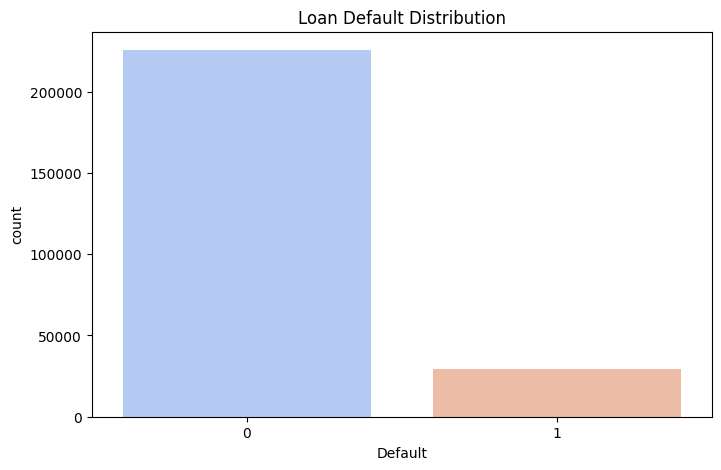

In [ ]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(8,5))
sns.countplot(x='Default', data=df, palette='coolwarm')
plt.title("Loan Default Distribution")
plt.show()

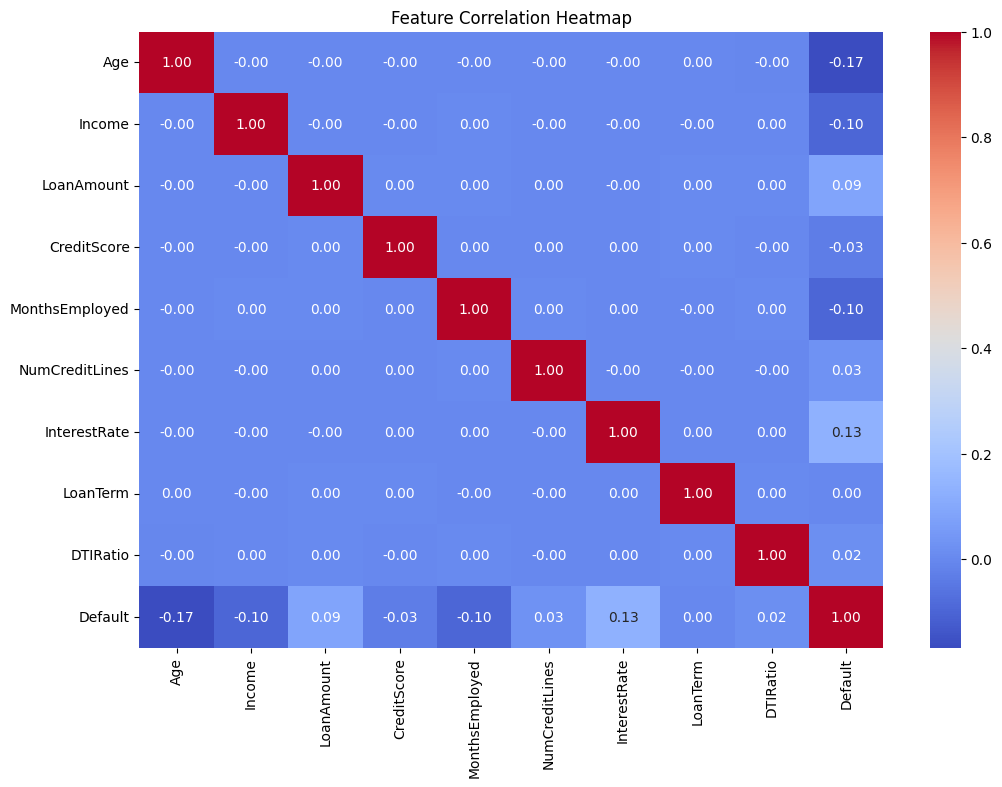

In [ ]:
# Checking correlation
plt.figure(figsize=(12,8))
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

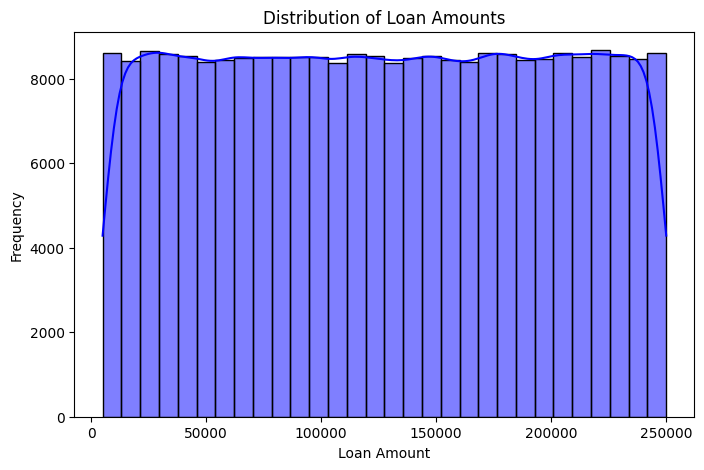

In [ ]:
# Visualizing loan amount distribution
plt.figure(figsize=(8,5))
sns.histplot(df['LoanAmount'], bins=30, kde=True, color='blue')
plt.title("Distribution of Loan Amounts")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

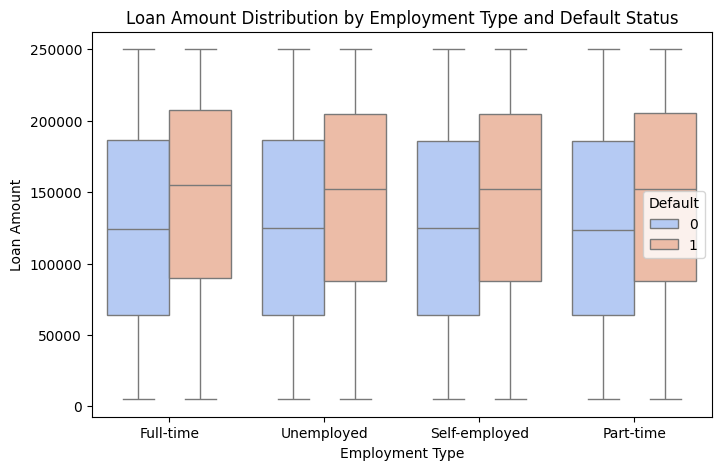

In [ ]:
# Visualizing impact of employment type on default rate
plt.figure(figsize=(8,5))
sns.boxplot(x='EmploymentType', y='LoanAmount', hue='Default', data=df, palette='coolwarm')
plt.title("Loan Amount Distribution by Employment Type and Default Status")
plt.xlabel("Employment Type")
plt.ylabel("Loan Amount")
plt.legend(title="Default")
plt.show()


In [ ]:
# Data Preprocessing
categorical_cols = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

X = df.drop(columns=['LoanID', 'Default'])
y = df['Default']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("\nAfter Encoding, First 5 Rows:")
print(df.head())

print("\nFeature Set Shape:", X.shape)
print("Target Variable Distribution:\n", y.value_counts())

print("\nFirst 5 Rows of Scaled Data:")
print(pd.DataFrame(X_scaled, columns=X.columns).head())

print("\nTraining Set Size:", X_train.shape, "Testing Set Size:", X_test.shape)



After Encoding, First 5 Rows:
       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  \
0               4         15.23        36      0.44          0   
1               1          4.81        60      0.68          2   
2               3         21.17        24      0.31          2   
3               3          7.07        24      0.23          1   
4               4          6.51        48      0.73          0   

   EmploymentType  MaritalStatus  HasMortgage  HasDependents  LoanPurpose  \
0               0              0            1              1        

In [ ]:
from tensorflow.keras.layers import Input

# ANN Model Building
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Define input shape using Input layer
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,089 (4.25 KB)

 Trainable params: 1,089 (4.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Model Training
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

Epoch 1/20
6384/6384 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8693 - loss: 0.3604 - val_accuracy: 0.8848 - val_loss: 0.3149
Epoch 2/20
6384/6384 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8837 - loss: 0.3238 - val_accuracy: 0.8852 - val_loss: 0.3134
Epoch 3/20
6384/6384 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8845 - loss: 0.3191 - val_accuracy: 0.8849 - val_loss: 0.3133
Epoch 4/20
6384/6384 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8856 - loss: 0.3156 - val_accuracy: 0.8857 - val_loss: 0.3127
Epoch 5/20
6384/6384 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8854 - loss: 0.3171 - val_accuracy: 0.8852 - val_loss: 0.3127
Epoch 6/20
6384/6384 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8844 - loss: 0.3183 - val_accuracy: 0.8856 - val_loss: 0.3136
Epoch 7/20
6384/6384 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8856 - loss: 0.3158 - val_accuracy: 0.8867 - val_loss: 0.3117
Epoch 8/20
6384/6384 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.8852 - loss: 0

In [ ]:
# Print training and validation loss and accuracy for each epoch
for epoch_num in range(len(history.history['loss'])):
    print(f"Epoch {epoch_num + 1}: Training Loss = {history.history['loss'][epoch_num]:.4f}, "
          f"Training Accuracy = {history.history['accuracy'][epoch_num]:.4f}, "
          f"Validation Loss = {history.history['val_loss'][epoch_num]:.4f}, "
          f"Validation Accuracy = {history.history['val_accuracy'][epoch_num]:.4f}")

Epoch 1: Training Loss = 0.3360, Training Accuracy = 0.8816, Validation Loss = 0.3149, Validation Accuracy = 0.8848
Epoch 2: Training Loss = 0.3216, Training Accuracy = 0.8845, Validation Loss = 0.3134, Validation Accuracy = 0.8852
Epoch 3: Training Loss = 0.3186, Training Accuracy = 0.8847, Validation Loss = 0.3133, Validation Accuracy = 0.8849
Epoch 4: Training Loss = 0.3175, Training Accuracy = 0.8852, Validation Loss = 0.3127, Validation Accuracy = 0.8857
Epoch 5: Training Loss = 0.3176, Training Accuracy = 0.8849, Validation Loss = 0.3127, Validation Accuracy = 0.8852
Epoch 6: Training Loss = 0.3172, Training Accuracy = 0.8851, Validation Loss = 0.3136, Validation Accuracy = 0.8856
Epoch 7: Training Loss = 0.3171, Training Accuracy = 0.8853, Validation Loss = 0.3117, Validation Accuracy = 0.8867
Epoch 8: Training Loss = 0.3168, Training Accuracy = 0.8850, Validation Loss = 0.3124, Validation Accuracy = 0.8863
Epoch 9: Training Loss = 0.3168, Training Accuracy = 0.8852, Validation 

In [ ]:
# Model Evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

1596/1596 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8889 - loss: 0.3099
Test Accuracy: 0.8873


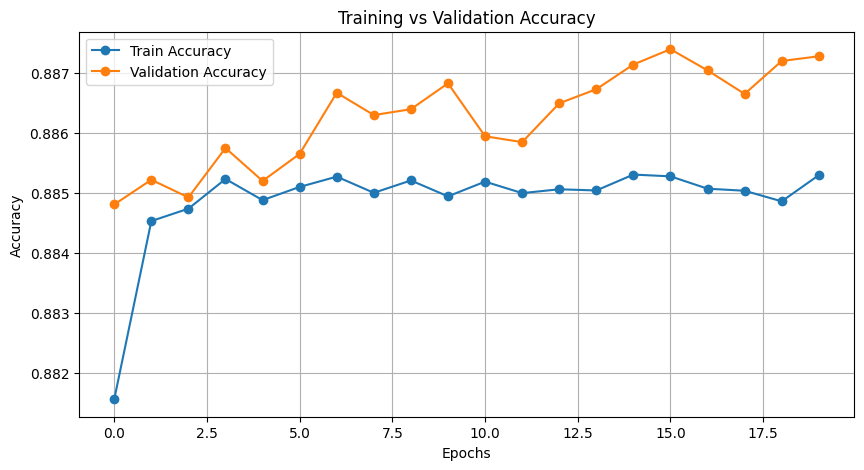

In [ ]:
# Performance Visualization
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.grid()
plt.show()

**Business Insights & Conclusion**

**Business Insights:**

1. The ANN model successfully predicts loan default with a reasonable accuracy.
2. Higher correlation between features like 'EmploymentType' and 'HasMortgage' suggests financial stability factors are critical in default prediction.
3. Loan applicants with higher education and stable employment tend to have a lower risk of defaulting.
4. Loan amount distributions show higher variance for certain employment types, suggesting varying risk levels.
5.The bank can use this model to automate loan approval decisions, reducing
  human bias and improving risk assessment.


**Conclusion:**

* This project demonstrated how Artificial Neural Networks (ANN) can be applied
in financial risk prediction.
* While the model achieved a decent accuracy, improvements can be made by adding more complex features and optimizing hyperparameters.
* Future work can involve integrating external financial factors such as credit scores and economic indicators.
* By leveraging deep learning models like ANN, financial institutions can significantly reduce the risks associated with loan defaults.

**Overall, the model presents a valuable decision-making tool for financial institutions to improve loan assessment and minimize default risks.**